In [63]:
import json
with open('thermo_meta.json', 'r', encoding='utf-8') as f:
    per_meta = json.load(f)
with open('thermo_sen.json', 'r', encoding='utf-8') as f:
    per_sen = json.load(f)

In [52]:
from chemdataextractor import Document
from tqdm import tqdm

# copy and paste abstract text into Document
with open('thermo.json', 'r', encoding='utf-8') as f:
    ald_dict = json.load(f)
spans = {}
for a in tqdm(ald_dict.keys()):
    doc = Document(ald_dict[a])
    spans[a] = doc.cems

100%|██████████| 52981/52981 [36:24<00:00, 24.26it/s] 


In [12]:
def find_nearest(sen, ci, span):
    distance = 10000
    nearest = ''
    for s in span:
        cd = abs(s.start-ci)
        if cd < distance:
            distance = cd
            nearest = s.text
    if distance > 300:
        nearest = ''
    return nearest

In [7]:
def process_file(text):
    zt_answer = {}
    for i, z in enumerate(text):
        z_split = z.split(', ')
        if z_split[1] != 'NaN':
            mat_name = z_split[0][1:-1]
            mat_rec = float(z_split[1])
            if mat_name in zt_answer.keys():
                if mat_rec > zt_answer[mat_name]:
                    zt_answer[mat_name] = mat_rec
            else:
                zt_answer[mat_name] = mat_rec

    sorted_zt = sorted(zt_answer.items(), key=lambda item: item[1], reverse=True)
    zt_rank = {}
    rank = 1
    processor = MatScholarProcess()
    for s in sorted_zt:
        processed, _ = processor.process(s[0])
        if processed[0] not in zt_rank.keys():
            zt_rank[processed[0]] = {}
            zt_rank[processed[0]]['rank'] = rank
            zt_rank[processed[0]]['value'] = s[1]
            rank += 1
    return zt_rank

In [6]:
from operator import itemgetter
def rank_return(value_dict):
    rank_dict = {}
    names = list(value_dict.keys())
    values = list(value_dict.values())
    # 从大到小
    in_f, sort_f = zip(*sorted(enumerate(values), key=itemgetter(1), reverse=True))
    for i, index in enumerate(in_f):
        rank_dict[names[index]] = i
    return rank_dict

In [30]:
mat_freq = {}
o_record = {}
with open('thermo.txt', 'r', encoding='utf-8') as f:
    data = f.readlines()
    for sen in tqdm(data):
        # print('\n')
        # print(sen[:-1])
        o_record[sen[:-1]] = {}
        doi = per_sen[sen[:-1]]['doi']
        if 'year' in per_meta[doi].keys():
            time = per_meta[doi]['year']
            o_record[sen[:-1]]['time'] = time
        else:
            time = '?'
            print('?')
            o_record[sen[:-1]]['time'] = time
        if 'i_d' in per_meta[doi].keys():
            id_ = per_meta[doi]['i_d']  
            o_record[sen[:-1]]['id'] = id_
        else:
            id_ = '?'  
            o_record[sen[:-1]]['id'] = id_
        doc = Document(sen[:-1])
        if len(doc.records) == 0:
            current_index = per_sen[sen[:-1]]['index']
            span = spans[doi]
            nearest_m = find_nearest(sen[:-1], current_index, span)
            if nearest_m != '':
                o_record[sen[:-1]]['mat'] = [nearest_m]
        else:
            for r in doc.records:
                r_d = r.serialize()
                if 'names' in r_d.keys():
                    # print(r_d['names'])
                    o_record[sen[:-1]]['mat'] = r_d['names']
        if 'mat' in o_record[sen[:-1]].keys():
            for n in o_record[sen[:-1]]['mat']:
                if n in mat_freq.keys():
                    mat_freq[n]['freq'] += 1
                    if time in mat_freq[n]['year_freq'].keys():
                        mat_freq[n]['year_freq'][time] += 1
                    else:
                        mat_freq[n]['year_freq'][time] = 1
                else:
                    mat_freq[n] = {}
                    mat_freq[n]['freq'] = 1
                    mat_freq[n]['year_freq'] = {}
                    mat_freq[n]['year_freq'][time] = 1

  0%|          | 180/49762 [00:23<1:59:38,  6.91it/s]

?


  1%|          | 254/49762 [00:34<1:42:17,  8.07it/s]

?


  1%|          | 324/49762 [00:43<1:31:10,  9.04it/s]

?


  2%|▏         | 864/49762 [02:05<1:34:35,  8.62it/s]

?
?


  2%|▏         | 1052/49762 [02:32<2:02:05,  6.65it/s]

?


  3%|▎         | 1368/49762 [03:18<1:13:07, 11.03it/s]

?


  5%|▍         | 2303/49762 [05:41<2:00:57,  6.54it/s]

?


  5%|▌         | 2529/49762 [06:14<1:13:40, 10.68it/s]

?
?


  5%|▌         | 2678/49762 [06:37<1:23:32,  9.39it/s]

?


  8%|▊         | 3974/49762 [09:58<1:44:25,  7.31it/s]

?
?


  8%|▊         | 4127/49762 [10:19<2:05:52,  6.04it/s]

?


  8%|▊         | 4173/49762 [10:28<1:44:56,  7.24it/s]

?
?


  9%|▉         | 4720/49762 [11:57<1:21:06,  9.26it/s]

?
?


 10%|▉         | 4964/49762 [12:37<1:40:16,  7.45it/s]

?
?
?
?


 11%|█         | 5520/49762 [14:09<1:39:11,  7.43it/s]

?


 11%|█         | 5561/49762 [14:16<1:56:54,  6.30it/s]

?


 11%|█▏        | 5669/49762 [14:34<1:30:51,  8.09it/s]

?
?
?


 11%|█▏        | 5695/49762 [14:40<2:42:12,  4.53it/s]

?


 12%|█▏        | 6055/49762 [15:40<1:53:18,  6.43it/s]

?
?
?


 13%|█▎        | 6511/49762 [16:54<1:48:09,  6.66it/s]

?


 13%|█▎        | 6687/49762 [17:26<2:00:38,  5.95it/s]

?
?
?
?


 15%|█▌        | 7486/49762 [19:40<1:12:53,  9.67it/s]

?
?


 15%|█▌        | 7516/49762 [19:44<1:54:31,  6.15it/s]

?


 15%|█▌        | 7677/49762 [20:12<1:37:18,  7.21it/s]

?
?


 15%|█▌        | 7679/49762 [20:13<1:33:58,  7.46it/s]

?


 16%|█▋        | 8163/49762 [21:33<1:37:33,  7.11it/s]

?


 16%|█▋        | 8201/49762 [21:39<2:14:37,  5.15it/s]

?
?


 16%|█▋        | 8205/49762 [21:40<2:02:54,  5.64it/s]

?


 17%|█▋        | 8431/49762 [22:15<1:33:55,  7.33it/s]

?


 17%|█▋        | 8433/49762 [22:16<2:06:57,  5.43it/s]

?


 17%|█▋        | 8694/49762 [22:59<1:14:52,  9.14it/s]

?


 18%|█▊        | 8889/49762 [23:30<2:19:51,  4.87it/s]

?


 18%|█▊        | 9059/49762 [23:57<1:29:03,  7.62it/s]

?
?


 18%|█▊        | 9060/49762 [23:58<1:54:42,  5.91it/s]

?


 18%|█▊        | 9063/49762 [23:58<1:55:20,  5.88it/s]

?


 19%|█▉        | 9598/49762 [25:24<1:25:34,  7.82it/s]

?
?
?


 19%|█▉        | 9605/49762 [25:25<1:23:57,  7.97it/s]

?


 19%|█▉        | 9619/49762 [25:27<1:11:37,  9.34it/s]

?


 19%|█▉        | 9665/49762 [25:35<1:37:37,  6.84it/s]

?
?


 21%|██        | 10448/49762 [27:46<1:19:32,  8.24it/s]

?
?
?


 21%|██        | 10507/49762 [27:56<1:40:42,  6.50it/s]

?


 21%|██        | 10566/49762 [28:04<1:17:35,  8.42it/s]

?
?
?


 22%|██▏       | 10710/49762 [28:29<1:37:40,  6.66it/s]

?


 22%|██▏       | 10760/49762 [28:36<1:33:57,  6.92it/s]

?


 22%|██▏       | 10886/49762 [28:57<1:18:26,  8.26it/s]

?
?
?


 22%|██▏       | 10890/49762 [28:58<1:20:15,  8.07it/s]

?


 22%|██▏       | 11097/49762 [29:29<1:21:11,  7.94it/s]

?
?
?


 22%|██▏       | 11101/49762 [29:29<1:03:53, 10.09it/s]

?


 23%|██▎       | 11407/49762 [30:17<1:35:25,  6.70it/s]

?


 23%|██▎       | 11593/49762 [30:44<1:10:59,  8.96it/s]

?
?


 23%|██▎       | 11597/49762 [30:45<1:22:14,  7.73it/s]

?
?


 24%|██▍       | 11871/49762 [31:28<1:14:44,  8.45it/s]

?
?


 24%|██▍       | 11881/49762 [31:30<1:52:09,  5.63it/s]

?
?


 24%|██▍       | 11883/49762 [31:30<1:33:07,  6.78it/s]

?


 24%|██▍       | 11886/49762 [31:31<1:39:28,  6.35it/s]

?


 25%|██▍       | 12246/49762 [32:28<1:07:06,  9.32it/s]

?


 26%|██▋       | 13122/49762 [34:46<1:45:26,  5.79it/s]

?


 26%|██▋       | 13126/49762 [34:47<1:37:58,  6.23it/s]

?


 27%|██▋       | 13197/49762 [34:58<1:31:18,  6.67it/s]

?


 27%|██▋       | 13495/49762 [35:45<1:33:37,  6.46it/s]

?


 27%|██▋       | 13633/49762 [36:05<1:23:27,  7.21it/s]

?
?


 28%|██▊       | 13690/49762 [36:14<1:09:29,  8.65it/s]

?


 28%|██▊       | 13741/49762 [36:21<1:39:38,  6.03it/s]

?
?


 28%|██▊       | 13971/49762 [36:57<1:27:43,  6.80it/s]

?
?


 28%|██▊       | 14179/49762 [37:26<55:55, 10.60it/s]  

?
?
?
?


 28%|██▊       | 14181/49762 [37:27<57:44, 10.27it/s]

?


 29%|██▉       | 14390/49762 [37:58<1:17:31,  7.60it/s]

?
?


 30%|██▉       | 14902/49762 [39:17<1:38:57,  5.87it/s]

?


 30%|██▉       | 14928/49762 [39:20<1:05:23,  8.88it/s]

?
?


 30%|███       | 14994/49762 [39:31<1:32:08,  6.29it/s]

?


 30%|███       | 15078/49762 [39:44<1:50:32,  5.23it/s]

?


 31%|███       | 15307/49762 [40:20<1:49:08,  5.26it/s]

?
?


 32%|███▏      | 15834/49762 [41:45<1:21:39,  6.93it/s]

?
?


 33%|███▎      | 16304/49762 [43:07<1:50:28,  5.05it/s]

?


 33%|███▎      | 16305/49762 [43:07<1:47:10,  5.20it/s]

?
?


 33%|███▎      | 16306/49762 [43:07<1:39:30,  5.60it/s]

?


 34%|███▍      | 16946/49762 [44:50<1:17:48,  7.03it/s]

?


 34%|███▍      | 17058/49762 [45:10<1:09:06,  7.89it/s]

?


 34%|███▍      | 17113/49762 [45:20<1:10:29,  7.72it/s]

?
?


 35%|███▌      | 17581/49762 [46:39<1:46:34,  5.03it/s]

?


 37%|███▋      | 18167/49762 [48:15<1:16:22,  6.90it/s]

?
?


 37%|███▋      | 18298/49762 [48:35<1:16:24,  6.86it/s]

?


 38%|███▊      | 18847/49762 [50:06<56:00,  9.20it/s]  

?


 38%|███▊      | 18850/49762 [50:07<1:18:00,  6.60it/s]

?
?


 38%|███▊      | 19063/49762 [50:42<1:17:30,  6.60it/s]

?


 38%|███▊      | 19064/49762 [50:43<1:27:45,  5.83it/s]

?
?


 38%|███▊      | 19068/49762 [50:43<57:17,  8.93it/s]  

?


 39%|███▉      | 19468/49762 [51:51<1:40:18,  5.03it/s]

?


 39%|███▉      | 19474/49762 [51:52<1:24:56,  5.94it/s]

?
?
?
?


 39%|███▉      | 19491/49762 [51:54<1:01:27,  8.21it/s]

?


 40%|████      | 20146/49762 [53:40<1:19:07,  6.24it/s]

?
?
?


 41%|████      | 20246/49762 [53:55<59:53,  8.21it/s]  

?
?


 41%|████      | 20260/49762 [53:58<1:32:48,  5.30it/s]

?
?


 41%|████      | 20263/49762 [53:59<1:19:00,  6.22it/s]

?
?


 41%|████      | 20406/49762 [54:22<1:00:23,  8.10it/s]

?
?


 41%|████▏     | 20577/49762 [54:49<1:41:44,  4.78it/s]

?
?


 42%|████▏     | 20825/49762 [55:26<1:11:09,  6.78it/s]

?


 42%|████▏     | 20858/49762 [55:30<48:57,  9.84it/s]  

?


 44%|████▎     | 21741/49762 [57:47<59:01,  7.91it/s]  

?
?
?


 44%|████▍     | 22103/49762 [58:47<1:15:26,  6.11it/s]

?
?


 44%|████▍     | 22105/49762 [58:48<1:36:33,  4.77it/s]

?
?


 44%|████▍     | 22108/49762 [58:48<1:05:21,  7.05it/s]

?


 45%|████▍     | 22246/49762 [59:11<58:42,  7.81it/s]  

?
?


 45%|████▍     | 22249/49762 [59:11<42:24, 10.81it/s]

?


 45%|████▌     | 22410/49762 [59:35<37:21, 12.20it/s]  

?


 46%|████▌     | 22969/49762 [1:00:58<59:08,  7.55it/s]  

?


 46%|████▌     | 22972/49762 [1:00:58<56:00,  7.97it/s]  

?


 46%|████▌     | 22984/49762 [1:01:01<1:04:22,  6.93it/s]

?
?


 46%|████▌     | 22988/49762 [1:01:01<55:30,  8.04it/s]  

?
?


 46%|████▋     | 23021/49762 [1:01:06<57:45,  7.72it/s]  

?
?


 46%|████▋     | 23076/49762 [1:01:12<1:02:31,  7.11it/s]

?
?
?


 46%|████▋     | 23080/49762 [1:01:13<46:27,  9.57it/s]  

?
?


 47%|████▋     | 23601/49762 [1:02:23<48:22,  9.01it/s]  

?
?
?


 47%|████▋     | 23604/49762 [1:02:24<45:21,  9.61it/s]

?
?
?


 47%|████▋     | 23607/49762 [1:02:24<1:01:01,  7.14it/s]

?
?


 47%|████▋     | 23611/49762 [1:02:25<1:00:24,  7.21it/s]

?


 48%|████▊     | 23800/49762 [1:02:52<55:17,  7.83it/s]  

?


 48%|████▊     | 23861/49762 [1:03:01<48:46,  8.85it/s]  

?


 48%|████▊     | 23942/49762 [1:03:11<46:34,  9.24it/s]  

?
?
?
?


 48%|████▊     | 23944/49762 [1:03:11<47:53,  8.98it/s]

?


 48%|████▊     | 23955/49762 [1:03:12<40:20, 10.66it/s]

?
?
?


 48%|████▊     | 23959/49762 [1:03:12<40:56, 10.50it/s]

?
?
?


 48%|████▊     | 23961/49762 [1:03:13<44:31,  9.66it/s]

?
?
?


 48%|████▊     | 23963/49762 [1:03:13<40:50, 10.53it/s]

?


 48%|████▊     | 23978/49762 [1:03:15<1:01:46,  6.96it/s]

?


 48%|████▊     | 23991/49762 [1:03:17<48:28,  8.86it/s]  

?
?


 48%|████▊     | 23998/49762 [1:03:17<41:35, 10.32it/s]

?


 48%|████▊     | 24001/49762 [1:03:18<52:21,  8.20it/s]

?
?


 48%|████▊     | 24004/49762 [1:03:18<48:14,  8.90it/s]

?
?
?


 48%|████▊     | 24008/49762 [1:03:19<48:59,  8.76it/s]

?


 48%|████▊     | 24010/49762 [1:03:19<1:02:47,  6.84it/s]

?


 48%|████▊     | 24012/49762 [1:03:19<1:08:45,  6.24it/s]

?


 48%|████▊     | 24024/49762 [1:03:21<52:12,  8.22it/s]  

?


 48%|████▊     | 24025/49762 [1:03:21<1:02:09,  6.90it/s]

?


 48%|████▊     | 24039/49762 [1:03:23<49:36,  8.64it/s]  

?
?
?


 48%|████▊     | 24049/49762 [1:03:25<48:23,  8.85it/s]  

?
?
?


 48%|████▊     | 24051/49762 [1:03:25<47:39,  8.99it/s]

?
?


 48%|████▊     | 24054/49762 [1:03:25<56:18,  7.61it/s]

?


 48%|████▊     | 24099/49762 [1:03:31<38:22, 11.14it/s]  

?
?


 48%|████▊     | 24127/49762 [1:03:34<53:30,  7.98it/s]

?
?


 48%|████▊     | 24130/49762 [1:03:35<1:02:22,  6.85it/s]

?
?
?
?


 48%|████▊     | 24134/49762 [1:03:35<52:32,  8.13it/s]  

?
?


 49%|████▊     | 24136/49762 [1:03:35<53:22,  8.00it/s]

?
?
?


 49%|████▊     | 24137/49762 [1:03:35<50:50,  8.40it/s]

?


 49%|████▊     | 24142/49762 [1:03:37<1:25:04,  5.02it/s]

?
?
?


 49%|████▊     | 24144/49762 [1:03:37<1:10:02,  6.10it/s]

?
?
?


 49%|████▊     | 24173/49762 [1:03:42<54:03,  7.89it/s]  

?
?
?


 49%|████▊     | 24175/49762 [1:03:42<48:27,  8.80it/s]

?
?


 49%|████▊     | 24184/49762 [1:03:44<57:20,  7.43it/s]  

?
?
?


 49%|████▊     | 24187/49762 [1:03:44<43:32,  9.79it/s]

?
?
?
?


 49%|████▉     | 24259/49762 [1:03:54<44:32,  9.54it/s]  

?


 49%|████▉     | 24264/49762 [1:03:54<39:59, 10.63it/s]

?
?
?


 49%|████▉     | 24292/49762 [1:03:58<52:27,  8.09it/s]  

?


 49%|████▉     | 24362/49762 [1:04:07<1:09:08,  6.12it/s]

?


 49%|████▉     | 24403/49762 [1:04:13<49:47,  8.49it/s]  

?
?
?


 49%|████▉     | 24454/49762 [1:04:20<1:31:11,  4.63it/s]

?
?
?


 49%|████▉     | 24489/49762 [1:04:25<46:35,  9.04it/s]  

?
?


 49%|████▉     | 24544/49762 [1:04:32<1:04:40,  6.50it/s]

?


 49%|████▉     | 24611/49762 [1:04:41<43:29,  9.64it/s]  

?
?


 51%|█████     | 25177/49762 [1:05:57<38:18, 10.70it/s]  

?
?
?


 51%|█████     | 25179/49762 [1:05:57<58:01,  7.06it/s]

?


 51%|█████     | 25191/49762 [1:05:59<1:07:12,  6.09it/s]

?


 51%|█████     | 25203/49762 [1:06:00<44:54,  9.11it/s]  

?


 51%|█████     | 25427/49762 [1:06:30<51:13,  7.92it/s]  

?
?


 51%|█████▏    | 25627/49762 [1:06:55<42:56,  9.37it/s]  

?


 52%|█████▏    | 25738/49762 [1:07:12<59:19,  6.75it/s]  

?


 61%|██████    | 30386/49762 [1:17:42<55:04,  5.86it/s]  

?


 61%|██████    | 30387/49762 [1:17:43<1:27:03,  3.71it/s]

?


 61%|██████▏   | 30505/49762 [1:17:59<40:49,  7.86it/s]  

?


 61%|██████▏   | 30510/49762 [1:17:59<31:16, 10.26it/s]

?
?


 62%|██████▏   | 30799/49762 [1:18:37<28:26, 11.11it/s]  

?


 62%|██████▏   | 31046/49762 [1:19:16<38:28,  8.11it/s]  

?
?


 62%|██████▏   | 31092/49762 [1:19:22<33:58,  9.16it/s]  

?
?
?


 62%|██████▏   | 31096/49762 [1:19:22<26:53, 11.57it/s]

?


 63%|██████▎   | 31104/49762 [1:19:23<35:29,  8.76it/s]

?
?
?


 63%|██████▎   | 31108/49762 [1:19:24<31:43,  9.80it/s]

?
?
?


 63%|██████▎   | 31110/49762 [1:19:24<40:39,  7.65it/s]

?
?


 63%|██████▎   | 31124/49762 [1:19:26<48:24,  6.42it/s]

?
?
?


 63%|██████▎   | 31126/49762 [1:19:26<47:50,  6.49it/s]

?


 63%|██████▎   | 31183/49762 [1:19:36<43:04,  7.19it/s]  

?
?


 63%|██████▎   | 31185/49762 [1:19:36<44:24,  6.97it/s]

?
?


 63%|██████▎   | 31211/49762 [1:19:39<32:35,  9.49it/s]

?


 63%|██████▎   | 31286/49762 [1:19:49<34:21,  8.96it/s]  

?
?
?


 63%|██████▎   | 31288/49762 [1:19:49<31:38,  9.73it/s]

?


 64%|██████▍   | 32005/49762 [1:21:28<51:32,  5.74it/s]  

?


 70%|██████▉   | 34728/49762 [1:27:58<33:49,  7.41it/s]  

?
?


 70%|███████   | 34984/49762 [1:28:37<38:31,  6.39it/s]  

?


 70%|███████   | 35036/49762 [1:28:45<32:34,  7.54it/s]

?
?


 70%|███████   | 35046/49762 [1:28:46<21:49, 11.24it/s]

?
?
?
?
?


 70%|███████   | 35048/49762 [1:28:46<24:38,  9.95it/s]

?
?


 70%|███████   | 35050/49762 [1:28:46<27:50,  8.81it/s]

?
?


 71%|███████   | 35083/49762 [1:28:50<18:28, 13.25it/s]

?
?
?
?
?


 71%|███████   | 35085/49762 [1:28:50<18:40, 13.10it/s]

?
?


 72%|███████▏  | 35983/49762 [1:30:58<25:55,  8.86it/s]  

?


 72%|███████▏  | 36054/49762 [1:31:09<32:31,  7.03it/s]  

?


 72%|███████▏  | 36056/49762 [1:31:09<36:21,  6.28it/s]

?
?


 72%|███████▏  | 36059/49762 [1:31:10<28:32,  8.00it/s]

?


 72%|███████▏  | 36062/49762 [1:31:10<27:30,  8.30it/s]

?
?
?
?


 72%|███████▏  | 36065/49762 [1:31:10<27:17,  8.37it/s]

?


 73%|███████▎  | 36268/49762 [1:31:36<27:03,  8.31it/s]

?
?
?


 75%|███████▍  | 37248/49762 [1:33:49<28:33,  7.31it/s]  

?


 75%|███████▍  | 37259/49762 [1:33:53<45:17,  4.60it/s]  

?


 75%|███████▍  | 37261/49762 [1:33:54<49:15,  4.23it/s]

?


 75%|███████▍  | 37264/49762 [1:33:54<34:10,  6.10it/s]

?


 76%|███████▌  | 37821/49762 [1:35:16<27:36,  7.21it/s]  

?
?
?


 76%|███████▌  | 37823/49762 [1:35:16<23:35,  8.43it/s]

?


 76%|███████▌  | 37845/49762 [1:35:19<29:13,  6.80it/s]

?
?


 76%|███████▌  | 37849/49762 [1:35:19<20:21,  9.75it/s]

?
?
?
?
?


 76%|███████▌  | 37852/49762 [1:35:20<23:53,  8.31it/s]

?


 76%|███████▌  | 37855/49762 [1:35:20<24:10,  8.21it/s]

?
?
?


 76%|███████▌  | 37878/49762 [1:35:23<24:43,  8.01it/s]

?
?
?


 76%|███████▌  | 37880/49762 [1:35:23<24:06,  8.21it/s]

?


 80%|███████▉  | 39595/49762 [1:39:32<22:42,  7.46it/s]  

?


 80%|███████▉  | 39599/49762 [1:39:33<22:23,  7.56it/s]

?
?


 80%|███████▉  | 39656/49762 [1:39:41<25:20,  6.65it/s]

?


 80%|████████  | 40026/49762 [1:40:30<25:14,  6.43it/s]

?
?


 80%|████████  | 40041/49762 [1:40:32<21:18,  7.60it/s]

?
?


 80%|████████  | 40055/49762 [1:40:35<22:43,  7.12it/s]

?
?
?
?


 80%|████████  | 40057/49762 [1:40:35<19:29,  8.30it/s]

?
?


 81%|████████  | 40075/49762 [1:40:38<15:20, 10.53it/s]

?
?


 81%|████████  | 40077/49762 [1:40:38<20:06,  8.03it/s]

?


 81%|████████  | 40082/49762 [1:40:39<20:53,  7.72it/s]

?
?
?


 81%|████████  | 40087/49762 [1:40:39<17:00,  9.48it/s]

?


 81%|████████  | 40091/49762 [1:40:40<17:17,  9.32it/s]

?
?
?


 81%|████████  | 40093/49762 [1:40:40<15:53, 10.14it/s]

?
?


 81%|████████  | 40097/49762 [1:40:40<16:19,  9.87it/s]

?


 81%|████████  | 40125/49762 [1:40:44<22:01,  7.29it/s]

?
?


 81%|████████  | 40132/49762 [1:40:45<23:44,  6.76it/s]

?


 81%|████████  | 40161/49762 [1:40:49<19:52,  8.05it/s]

?
?
?


 81%|████████  | 40218/49762 [1:40:57<14:39, 10.85it/s]

?
?
?
?
?


 81%|████████  | 40222/49762 [1:40:57<13:58, 11.38it/s]

?
?


 81%|████████  | 40248/49762 [1:41:01<21:19,  7.44it/s]

?


 81%|████████  | 40409/49762 [1:41:24<15:08, 10.29it/s]  

?


 81%|████████▏ | 40460/49762 [1:41:32<26:07,  5.93it/s]

?


 81%|████████▏ | 40461/49762 [1:41:32<31:38,  4.90it/s]

?


 81%|████████▏ | 40463/49762 [1:41:32<32:14,  4.81it/s]

?


 81%|████████▏ | 40468/49762 [1:41:33<23:01,  6.73it/s]

?


 81%|████████▏ | 40472/49762 [1:41:33<16:12,  9.55it/s]

?
?
?


 81%|████████▏ | 40501/49762 [1:41:37<18:58,  8.13it/s]

?


 83%|████████▎ | 41268/49762 [1:43:29<18:11,  7.78it/s]

?
?


 94%|█████████▍| 46701/49762 [1:57:45<06:50,  7.45it/s]

?
?


 94%|█████████▍| 46708/49762 [1:57:46<08:14,  6.18it/s]

?


 94%|█████████▍| 46729/49762 [1:57:50<08:54,  5.68it/s]

?


 94%|█████████▍| 46734/49762 [1:57:50<06:27,  7.81it/s]

?
?


 94%|█████████▍| 46735/49762 [1:57:51<07:50,  6.43it/s]

?


 94%|█████████▍| 46738/49762 [1:57:51<08:54,  5.66it/s]

?


 94%|█████████▍| 46752/49762 [1:57:54<07:42,  6.50it/s]

?
?


 94%|█████████▍| 46764/49762 [1:57:56<07:16,  6.87it/s]

?
?


 94%|█████████▍| 46765/49762 [1:57:56<12:59,  3.85it/s]

?


 94%|█████████▍| 46773/49762 [1:57:58<08:08,  6.12it/s]

?
?
?


 94%|█████████▍| 46776/49762 [1:57:59<07:42,  6.45it/s]

?


 94%|█████████▍| 46928/49762 [1:58:22<07:13,  6.53it/s]

?


 95%|█████████▍| 47054/49762 [1:58:45<09:35,  4.71it/s]

?


 95%|█████████▍| 47090/49762 [1:58:52<09:04,  4.90it/s]

?
?


 95%|█████████▍| 47095/49762 [1:58:52<07:50,  5.67it/s]

?
?
?


 95%|█████████▍| 47145/49762 [1:59:00<05:14,  8.33it/s]

?


100%|██████████| 49762/49762 [2:06:39<00:00,  6.55it/s]


In [21]:
import kashgari
from kashgari.tasks.classification import CNN_Attention_Model, BiLSTM_Model, BiGRU_Model, CNN_Model, CNN_LSTM_Model
import json
from collections import Counter

loaded_model = CNN_Attention_Model.load_model('CNN_Attention_91')

2022-03-05 01:52:20,541 [DEBUG] kashgari - ------------------------------------------------
2022-03-05 01:52:20,542 [DEBUG] kashgari - Loaded gensim word2vec model's vocab
2022-03-05 01:52:20,542 [DEBUG] kashgari - model        : mat_embedding3/vectors.txt
2022-03-05 01:52:20,543 [DEBUG] kashgari - word count   : 529690
2022-03-05 01:52:20,543 [DEBUG] kashgari - Top 50 words : ['the', 'of', '.', ',', 'and', '<nUm>', 'in', 'a', 'to', ')', '(', 'with', '-', 'for', 'is', 'by', 'on', 'was', 'at', 'were', 'that', '–', 'as', 'are', 'from', '/', 'an', 'temperature', 'surface', 'using', 'high', 'which', 'C', '°', 'this', '%', 'In', 'it', 'A', '=', 'structure', 'properties', ':', 'phase', 'results', 'effect', 'these', 'than', 'based', 'different']
2022-03-05 01:52:20,544 [DEBUG] kashgari - ------------------------------------------------


In [31]:
for_predict = []
for o in o_record.keys():
    for_predict.append(o.split(' '))
results = loaded_model.predict(for_predict)
for i, o in enumerate(o_record.keys()):
    o_record[o]['attitude'] = results[i]

2022-03-05 12:59:35,707 [DEBUG] kashgari - predict input shape (49653, 398) x: 
[[   0    1    4 ...    0    0    0]
 [   0    1   30 ...    0    0    0]
 [   0    1  790 ...    0    0    0]
 ...
 [   0    1  636 ...    0    0    0]
 [   0    1 1984 ...    0    0    0]
 [   0    1  139 ...    0    0    0]]
2022-03-05 13:01:17,305 [DEBUG] kashgari - predict output shape (49653, 2)
2022-03-05 13:01:17,333 [DEBUG] kashgari - predict output argmax: [0 0 0 ... 0 0 0]


In [32]:
json_str = json.dumps(o_record, indent=4)
with open('thermo_sen_record.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)
json_str = json.dumps(mat_freq, indent=4)
with open('thermo_mat_record.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)

In [1]:
import json

with open('thermo_sen_record.json', 'r', encoding='utf-8') as f:
    per_sen_record = json.load(f)
    
for s in per_sen_record.keys():
    per_sen_record[s]['doi'] = per_sen[s]['doi']
    
json_str = json.dumps(per_sen_record, indent=4)
with open('thermo_sen_record.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)

NameError: name 'per_sen' is not defined

In [1]:
import json

with open('thermo_sen_record.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
with open('thermo_mat_record.json', 'r', encoding='utf-8') as f:
    mdata = json.load(f)

In [4]:
import import_ipynb
from matscholar import MatScholarProcess

freq_nom = {}
nom_dict = {}
processor = MatScholarProcess()
for s in list(mdata.keys()):
    processed, _ = processor.process(s)
    if len(processed)==1:
        if len(_) == 1:
            nom = _[0][1]
        else:
            nom = processed[0]
    else:
        if len(_)!=0:
            nom = _[-1][1]
        else:
            nom = ' '.join(processed)
    if s == 'bismuth telluride':
        nom = 'Bi2Te3'
    if s == 'perovskites':
        nom = 'perovskite'
    if nom not in freq_nom.keys():
        freq_nom[nom] = mdata[s]['freq']
    else:
        freq_nom[nom] += mdata[s]['freq']
    nom_dict[s] = nom
    
sorted_freq = sorted(freq_nom.items(), key=lambda item:item[1], reverse=True)
print(sorted_freq[:50])   

[('Si', 996), ('C', 881), ('graphene', 749), ('Cu', 687), ('TEG', 555), ('PbTe', 519), ('PEDOT', 514), ('Te', 491), ('Sb', 487), ('SeSn', 432), ('Sn', 391), ('Ag', 385), ('Ge', 336), ('O', 295), ('OZn', 291), ('Se', 284), ('H', 255), ('Bi', 254), ('Ni', 250), ('perovskite', 245), ('Zn', 230), ('GeTe', 224), ('Mg', 222), ('Fe', 218), ('Mn', 211), ('Li', 202), ('Co', 193), ('S', 189), ('oxides', 186), ('CoSb3', 186), ('Pb', 185), ('Ti', 183), ('N', 172), ('CO2', 171), ('Bi2Te3', 167), ('Al', 155), ('Na', 153), ('GeSi', 147), ('SnTe', 143), ('Pt', 136), ('chalcogenides', 135), ('Mg2Si', 134), ('Mg3Sb2', 133), ('Cu2Se', 132), ('MoS2', 127), ('B', 121), ('O3SrTi', 120), ('Bi2Se3', 114), ('oxide', 113), ('Ga', 110)]


In [13]:
from tqdm import tqdm

# 对于一个材料，每一年的driver个数，barrier个数
mat_features = {}
for m in data.keys():
    time = data[m]['time']
    att = data[m]['attitude']
    if 'mat' in data[m].keys():
        for mat in data[m]['mat']:
            nom_mat = nom_dict[mat]
            if nom_mat not in mat_features.keys():
                mat_features[nom_mat] = {}
                mat_features[nom_mat][time] = {}
                mat_features[nom_mat][time][att] = 1
            else:
                if time not in mat_features[nom_mat].keys():
                    mat_features[nom_mat][time] = {}
                    mat_features[nom_mat][time][att] = 1
                else:
                    if att not in mat_features[nom_mat][time].keys():
                        mat_features[nom_mat][time][att] = 1
                    else:
                        mat_features[nom_mat][time][att] += 1
print(len(mat_features.keys()))
for m in list(mat_features.keys())[:1]:
    print(m, mat_features[m])

5300
Bi2Te3 {'2019': {'driver': 11, 'barrier': 4}, '2013': {'barrier': 3, 'driver': 5}, '2020': {'driver': 25, 'barrier': 4}, '2014': {'driver': 7, 'barrier': 5}, '2021': {'driver': 19, 'barrier': 4}, '2022': {'barrier': 2, 'driver': 1}, '2015': {'driver': 5, 'barrier': 1}, '2016': {'driver': 5, 'barrier': 2}, '2017': {'driver': 5, 'barrier': 2}, '2009': {'driver': 5}, '2011': {'driver': 2, 'barrier': 3}, '2010': {'driver': 9}, '2018': {'driver': 12, 'barrier': 1}, '2007': {'driver': 2}, '2001': {'driver': 5}, '2003': {'driver': 1}, '?': {'driver': 1}, '2012': {'driver': 5, 'barrier': 2}, '2004': {'driver': 2}, '2006': {'driver': 3}, '2005': {'driver': 1}, '2008': {'driver': 3}}


In [4]:
json_str = json.dumps(mat_features, indent=4)
with open('thermo_mat_features.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)

In [8]:
with open('zt.json', 'r', encoding='utf-8') as f:
    zt = json.load(f)
zt_split = zt[2:-2].split('], [')
zt_rank = process_file(zt_split)
# 194 in zt: # 1 NaPb47Sr2Te50 2.27156 # 2 Na2Pb98Se15Te85 1.703161584 # 3 Na2Pb98Se25Te75 1.636067789
with open('PF.txt', 'r', encoding='utf-8') as f:
    pf = str(f.readlines())
pf_split = pf[4:-4].split('], [')
pf_rank = process_file(pf_split)
# 281 in max power factor: # 1 Bi2Te3 0.006728 # 2 Co2NaO4 0.0066667 # 3 HfNi4Sn4Ti2Zr 0.0065971

In [8]:
# output_sims
# embbeding_sims
with open('embbeding_sims.json', 'r', encoding='utf-8') as f:
    sims = json.load(f)

sim_dict = {}
rank = 1
for s in sims:
    if s[0] in pf_rank.keys():
        sim_dict[s[0]] = {}
        sim_dict[s[0]]['rank'] = rank
        sim_dict[s[0]]['value'] = s[1]
        rank += 1
# print(sim_dict)
# output embedding: 1 Bi2Te3 2 Ca9Mn10NdO30 3 Ca50Mn49NbO150 
# word embedding: 1 Bi2Te3 2 Ca50Mn49NbO150 3 CoFe3LaSb12

In [9]:
with open('smaller_3.json', 'r', encoding='utf-8') as f:
    smaller = json.load(f)
print(len(smaller))

77593


In [10]:
compare_ex = []
sim_rank = []
sim_value = []
rank = 1
for r in pf_rank.keys():
    if r in sim_dict.keys():
        compare_ex.append(rank)
        sim_rank.append(sim_dict[r]['rank'])
        sim_value.append(sim_dict[r]['value'])
        rank += 1
ex, L_s = zip(*sorted(enumerate(sim_rank), key=itemgetter(1)))  
print(len(sim_rank))

121


In [11]:
from scipy import stats
stats.spearmanr(compare_ex, ex)

SpearmanrResult(correlation=0.5816623763717652, pvalue=2.6299339013365192e-12)

In [12]:
with open('fre_dis.json', 'r', encoding='utf-8') as f:
    fre_dis = json.load(f)

In [125]:
for f in fre_dis.keys():
    del fre_dis[f]['p_t']

In [ ]:
'''
# x_predict_data, x_train_data, y_predict_data, y_train_data = train_test_split(x_pre_data, y_data, test_size=0.1, random_state=42)
# 划分训练数据集和预测数据集
def divide(xdata, ydata, percent):
    sign_list = list(range(len(xdata)))
    # 用于测试的序号(replace=False即不再放回)和对应的测试集
    select_sign = sorted(np.random.choice(sign_list,int(len(x_data)*percent),replace=False))
    x_predict_data = xdata[select_sign]
    y_predict_data = np.array(ydata)[select_sign]
    # 用于训练的序号和对应训练集
    no_select_sign = [_ for _ in sign_list if _ not in select_sign]
    x_train_data = xdata[no_select_sign]
    y_train_data = np.array(ydata)[no_select_sign]
    return no_select_sign, x_train_data, y_train_data, x_predict_data, y_predict_data
# 数字为测试集数量
left_idx, x_train_data, y_train_data, x_predict_data, y_predict_data = divide(x_pre_data, y_data, 0.5)
'''

66


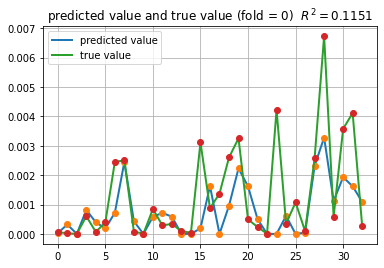

SpearmanrResult(correlation=0.6427139037433155, pvalue=5.502930454425154e-05)
33
1 Bi2Te3 Bi2Te3 Bi2Te3
2 Ca2Co2O5 Sb3Zn4 HfNi4Sn4Ti2Zr
3 Sb2Te3 Sb2Te3 Hf7Ni20Sn20Ti6Zr7
4 NbNi50Sn50Zr49 NiSnTi Co16InSb48
5 Co16InSb48 Ce2CoFe7Sb24 NbNi50Sn50Zr49
6 Pb49Te50Tl HfNi4Sn4Ti2Zr Bi22Sb3
7 Hf7Ni20Sn20Ti6Zr7 Bi8K2Se13 Bi9Sb
8 CoNbSn Hf7Ni20Sn20Ti6Zr7 Sb2Te3
9 Bi4CsTe6 Bi4CsTe6 Ca2Co2O5
10 Bi8K2Se13 Bi22Sb3 Ni50SbSn49Zr50
11 Bi9Sb Ni50SbSn49Zr50 NiSnTi
12 CeFe4Sb12 Co40InSb120 Co40InSb120
13 Ni50SbSn49Zr50 Cu10MgO20Rh9 Pb49Te50Tl
14 AlO100Zn99 CeFe4Sb12 GeSi9
15 Sb3Zn4 NbNi50Sn50Zr49 CeFe4Sb12
16 Cu99Se50 Bi3Ca27Co40O90 Bi4CsTe6
17 GeSi9 MnSb11Yb14 CoNbSn
18 O30Sr9Ti10Y CoNbSn Cu10MgO20Rh9
19 Ce2CoFe7Sb24 Bi9Sb Sb3Zn4
20 Cu2Mo3S4 O30Sr9Ti10Y Cu99Se50
21 Bi3Ca27Co40O90 Co16InSb48 AlO100Zn99
22 Bi22Sb3 GeIn9O15 Bi8K2Se13
23 Cu10MgO20Rh9 Pb49Te50Tl O30Sr9Ti10Y
24 BiTe6Tl9 Ca2Co2O5 BiTe6Tl9
25 Cr13Mo60S80 Cr13Mo60S80 LaO30Sr9Ti10
26 HfNi4Sn4Ti2Zr BiTe6Tl9 Ce2CoFe7Sb24
27 NiSnTi LaO30Sr9Ti10 Cu2Mo3S4

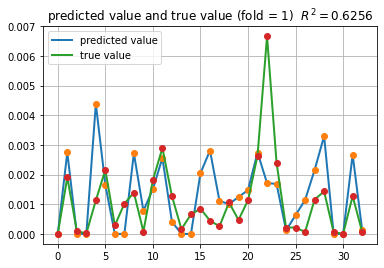

SpearmanrResult(correlation=0.7479946524064172, pvalue=5.626566522416566e-07)
33
1 AlO20Zn19 CoFe3LaSb12 Co2NaO4
2 Mg2Si CeCoFe3Sb12 Bi23Sb2
3 Ba3LaO30Sr6Ti10 Ca3Co4O9 Co20InSb60
4 NaPb49Te50 NaPb49Te50 NiSnZr
5 Co20InSb60 AlO50Zn49 Ba39Nb200O600Sr61
6 HfNi2Sn2Zr Co20InSb60 NaPb49Te50
7 BiMg100Si49 HfNi2Sn2Zr Ca3Co4O9
8 Bi23Sb2 Bi23Sb2 Mg2Si
9 CeCoFe3Sb12 NiSnZr HfNi2Sn2Zr
10 AlO50Zn49 O1361W500 Ba4Ga8Ge15
11 Co2NaO4 Cu2Se BiMg100Si49
12 NiSnZr CeCo2Fe2Sb12 CeCoFe3Sb12
13 Ba39Nb200O600Sr61 Ba4Ga8Ge15 BiCoO4Sr
14 Ca3Co4O9 Ba2O15Pb5Sr3 AlO20Zn19
15 BiCoO4Sr Co2NaO4 Bi83Sb17
16 Ga8Ge15Sr4 Ba4Ga8Sn15 GeSi4
17 LaO60Sr19Ti20 Ge3In397O600 AlO50Zn49
18 SnTe5Tl2 Pb99Te100Tl CoFe3LaSb12
19 Bi83Sb17 Mg2Si Ga8Ge15Sr4
20 CeCo2Fe2Sb12 Ba4Ga8Si15 Ba3LaO30Sr6Ti10
21 Cu2Se Bi83Sb17 Pb99Te100Tl
22 Ba4Ga8Ge15 BiMg100Si49 SnTe5Tl2
23 Ge3In397O600 Ba3LaO30Sr6Ti10 Cu2Se
24 LaO15Sr4Ti5 NbO15Sr5Ti4 LaO15Sr4Ti5
25 GeSi4 LaO60Sr19Ti20 NbO15Sr5Ti4
26 CoFe3LaSb12 GeSi4 O1361W500
27 Pb99Te100Tl Ga8Ge15Sr4 CeCo2Fe2

In [15]:
from sklearn import preprocessing as spp
from sklearn.model_selection import train_test_split
import random
from sklearn import linear_model
import numpy as np

x_data = []
y_data = []
sample_name = []
for p in pf_rank.keys():
    if p in sim_dict.keys():
        sample_name.append(p)
        sim_value = sim_dict[p]['value']
        tmp = []
        if p in fre_dis.keys():
            tmp.append(sim_value)
            tmp.extend(list(fre_dis[p].values()))
            x_data.append(tmp)
            y_value = pf_rank[p]['value']
            y_data.append(y_value)
print(len(x_data))     
    
scaler = spp.MinMaxScaler()
x_pre_data = scaler.fit_transform(x_data)
# 11
# 7 0.6037767379679144
# 18 0.6087232620320857
# 21 0.6088235294117647
# 23 0.624298128342246

# 2 0.631074481074481
random.seed(11)
index = random.sample(range(0, len(y_data)), len(x_pre_data))
# index = []
# for i in range(54):
    # index.append(i)
index_dic = {}
for i in range(2):
    index_dic[i] = {}
    index_dic[i]['test'] = index[i*33:i*33+33]
    #index_dic[i]['test'] = random.sample(index, 27)
    if i == 1:
        index_dic[i]['test'] = index[i*33:]
    index_dic[i]['train'] = []
    for j in index:
        if j not in index_dic[i]['test']:
            index_dic[i]['train'].append(j)

sp_l = []       
for i in range(2):
    num_par = i
    x_train_data = x_pre_data[index_dic[num_par]['train']]
    y_train_data = np.array(y_data)[index_dic[num_par]['train']]
    x_predict_data = x_pre_data[index_dic[num_par]['test']]
    y_predict_data = np.array(y_data)[index_dic[num_par]['test']]
    reg = linear_model.LinearRegression()
    reg.fit(x_train_data, y_train_data)
    update_value = {}
    left_sample = []
    for idx, m in enumerate(sample_name):
        if idx in index_dic[num_par]['test']:
            left_sample.append(m)
            pr = reg.predict([x_pre_data[idx]])
            if m not in update_value.keys():
                if pr[0] < 0:
                    update_value[m] = 0
                else:
                    update_value[m] = pr[0]
    predict_result = reg.predict(x_predict_data)
    predict_up_result = []
    for p in predict_result:
        if p < 0:
            predict_up_result.append(0)
        else:
            predict_up_result.append(p)

    # 训练数据的预测值
    train_pre_result = reg.predict(x_train_data)
    figure('predicted value and true value (fold = '+ str(i)+')  ' + r'$R^2=%.4f$' % (r2_score(train_pre_result, y_train_data)), [predict_up_result, 'predicted value'],
           [y_predict_data, 'true value'])
    update_rank = rank_return(update_value)
    rank_1 = []
    rank_2 = []
    for p in left_sample:
        rank_1.append(pf_rank[p]['rank'])
        rank_2.append(update_rank[p])  
    print(stats.spearmanr(rank_1, rank_2))
    sp_l.append(stats.spearmanr(rank_1, rank_2)[0])
    our_list = sorted(update_rank.items(), key=lambda item:item[1])
    print(len(our_list))
    sim_dict_ = {}
    for s in sim_dict.keys():
        if s in update_rank.keys():
            sim_dict_[s] = sim_dict[s]['rank']
    pf_rank_ = {}
    for s in pf_rank.keys():
        if s in update_rank.keys():
            pf_rank_[s] = pf_rank[s]['rank']        
    sim_list = sorted(sim_dict_.items(), key=lambda item:item[1])
    answer_list = sorted(pf_rank_.items(), key=lambda item:item[1])
    for i, ent in enumerate(our_list):
        print(i+1, ent[0], sim_list[i][0], answer_list[i][0])
    
print(sum(sp_l)/len(sp_l))

Font 'default' does not have a glyph for '\u9884' [U+9884], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6d4b' [U+6d4b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4e0e' [U+4e0e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u771f' [U+771f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5b9e' [U+5b9e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u56fe' [U+56fe], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6a21' [U+6a21], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u578b' [U+578b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
D:\Anaconda3\envs\material\lib\site-packages\matplotlib\back

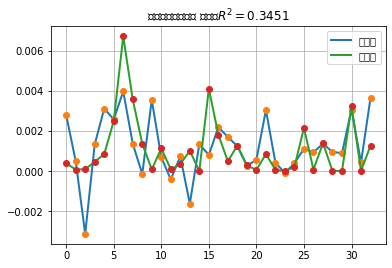

In [20]:
# 预测数据的预测值
predict_result = reg.predict(x_predict_data)

    # 训练数据的预测值
train_pre_result = reg.predict(x_train_data)
figure('预测值与真实值图 模型的' + r'$R^2=%.4f$' % (r2_score(train_pre_result, y_train_data)), [predict_result, '预测值'],
           [y_predict_data, '真实值'])

D:\Anaconda3\envs\material\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\material\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\material\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\material\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\material\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\material\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30340 mi

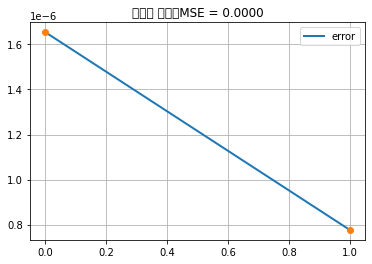

Font 'default' does not have a glyph for '\u9884' [U+9884], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6d4b' [U+6d4b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4e0e' [U+4e0e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u771f' [U+771f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5b9e' [U+5b9e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u56fe' [U+56fe], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6a21' [U+6a21], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u578b' [U+578b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
D:\Anaconda3\envs\material\lib\site-packages\matplotlib\back

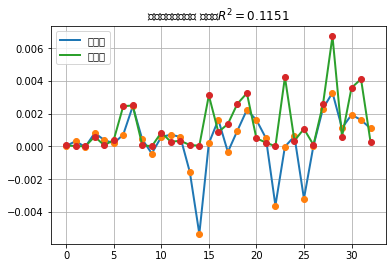

线性回归的系数为:
 w = [ 3.18745448e-03  8.11658688e-05  2.16946628e-02  1.83356962e-02
  1.64989699e-02  1.80993031e-02  1.88704543e-02  2.79216166e-03
 -2.68497959e-03  3.41439387e-04  2.06403163e-03  1.06454882e-03
  9.67790284e-04] 
 b = -0.022606311828356956


In [14]:
# 使用sklearn的包来做线性回归
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from pylab import mpl
# mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
# mpl.rcParams['font.sans-serif'] = ['Times New Roman']  # 中文字体
# mpl.rcParams['axes.unicode_minus'] = False # 这种字体没有basic unicode signs，负数没法正常显示，所以调整一下
def figure(title, *datalist):
    for jj in datalist:
        plt.plot(jj[0], '-', label=jj[1], linewidth=2)
        plt.plot(jj[0], 'o')
    plt.grid()
    plt.title(title)
    plt.legend()
    plt.savefig('./'+title+'.png',dpi=300)
    plt.show()
reg = linear_model.LinearRegression()
#  最终的程序
if __name__ == "__main__":

    # 开始训练
    reg.fit(x_train_data, y_train_data)

    # 预测数据的预测值
    predict_result = reg.predict(x_predict_data)

    # 训练数据的预测值
    train_pre_result = reg.predict(x_train_data)
    
    train_error = [mean_squared_error(y_train_data, [np.mean(y_train_data)] * len(y_train_data)),
                   mean_squared_error(y_train_data, train_pre_result)]

    # 绘制误差图
    figure('误差图 最终的MSE = %.4f' % (train_error[-1]), [train_error, 'error'])

    # 绘制预测值与真实值图
    figure('预测值与真实值图 模型的' + r'$R^2=%.4f$' % (r2_score(train_pre_result, y_train_data)), [predict_result, '预测值'],
           [y_predict_data, '真实值'])
    plt.show()

    # 线性回归的参数
    print('线性回归的系数为:\n w = %s \n b = %s' % (reg.coef_, reg.intercept_))

In [540]:
update_value = {}
left_sample = []
for i, m in enumerate(sample_name):
    if i in index_dic[num_par]['test']:
        left_sample.append(m)
        pr = reg.predict([x_pre_data[i]])
        if m not in update_value.keys():
            update_value[m] = pr[0]
update_rank = rank_return(update_value)

rank_1 = []
rank_2 = []
for p in left_sample:
    rank_1.append(pf_rank[p]['rank'])
    rank_2.append(update_rank[p])
    
stats.spearmanr(rank_1, rank_2)
# 0.6774
# 0.4070
# 0.4982
# 0.4470
# 0.5315

SpearmanrResult(correlation=0.6423076923076922, pvalue=0.0005365252209934896)

In [537]:
update_value = {}
    
for i, p in enumerate(sample_name):
    pr = reg.predict([x_pre_data[i]])
    update_value[p] = pr[0]
update_rank = rank_return(update_value)

rank_1 = []
rank_2 = []
for p in sample_name:
    rank_1.append(pf_rank[p]['rank'])
    rank_2.append(update_rank[p])
    
stats.spearmanr(rank_1, rank_2)
    

SpearmanrResult(correlation=0.5759178973038882, pvalue=4.813443571513363e-12)

In [51]:
count = 1
for m in pf_rank.keys():
    if m in mat_features.keys() and m in sim_dict.keys():
        print(m, sim_dict[m]['rank'], count)
        print(freq_nom[m], mat_features[m])
    if m in sim_dict.keys():
        count += 1

Bi2Te3 1 1
167 {'2019': {'driver': 11, 'barrier': 4}, '2013': {'barrier': 3, 'driver': 5}, '2020': {'driver': 25, 'barrier': 4}, '2014': {'driver': 7, 'barrier': 5}, '2021': {'driver': 19, 'barrier': 4}, '2022': {'barrier': 2, 'driver': 1}, '2015': {'driver': 5, 'barrier': 1}, '2016': {'driver': 5, 'barrier': 2}, '2017': {'driver': 5, 'barrier': 2}, '2009': {'driver': 5}, '2011': {'driver': 2, 'barrier': 3}, '2010': {'driver': 9}, '2018': {'driver': 12, 'barrier': 1}, '2007': {'driver': 2}, '2001': {'driver': 5}, '2003': {'driver': 1}, '?': {'driver': 1}, '2012': {'driver': 5, 'barrier': 2}, '2004': {'driver': 2}, '2006': {'driver': 3}, '2005': {'driver': 1}, '2008': {'driver': 3}}
Co2NaO4 41 2
19 {'2007': {'driver': 1}, '2020': {'barrier': 1, 'driver': 1}, '2006': {'driver': 2}, '2002': {'driver': 1}, '2019': {'driver': 2}, '2005': {'barrier': 1}, '2000': {'driver': 1, 'barrier': 1}, '1997': {'driver': 2, 'barrier': 1}, '2021': {'driver': 1}, '2011': {'driver': 2}, '2003': {'driver': 

In [55]:
test = []
for i in range(1, 122):
    test.append(i)
print(test)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]


In [56]:
test = [1, 20, 10, 8, 6, 11, 47, 38, 9, 10, 11, 18, 23, 17, 15, 16, 17, 21, 19, 20, 21, 22, 25, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 44, 35, 36, 37, 38, 39, 40, 30, 42, 43, 44, 45, 46, 47, 48, 49, 50, 11, 52, 53, 54, 55, 56, 57, 48, 59, 60, 61, 62, 43, 64, 45, 66, 65, 68, 69, 70, 71, 72, 75, 74, 75, 76, 67, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 79, 100, 101, 102, 103, 104, 105, 106, 107, 108, 103, 110, 111, 112, 103, 104, 105, 116, 117, 118, 119, 120, 121]

In [52]:
test = []
for s in sim_dict.keys():
    act_value = sim_dict[s]['rank']
    if s in freq_nom.keys():
        test.append(act_value-5)
        '''
        per_us = round(freq_us_rank[s]/len(freq_us_rank.keys()),2)
        per_sim = round(sim_dict[s]['rank']/len(sim_dict.keys()),2)
        if per_us > per_sim:
            add = int((per_us-per_sim)*20)
            test.append(act_value+add)
        else:
            minus = int((per_sim-per_us)*20)
            test.append(act_value-minus)
        '''
    else:
        test.append(act_value+5)